[*********************100%***********************]  30 of 30 completed


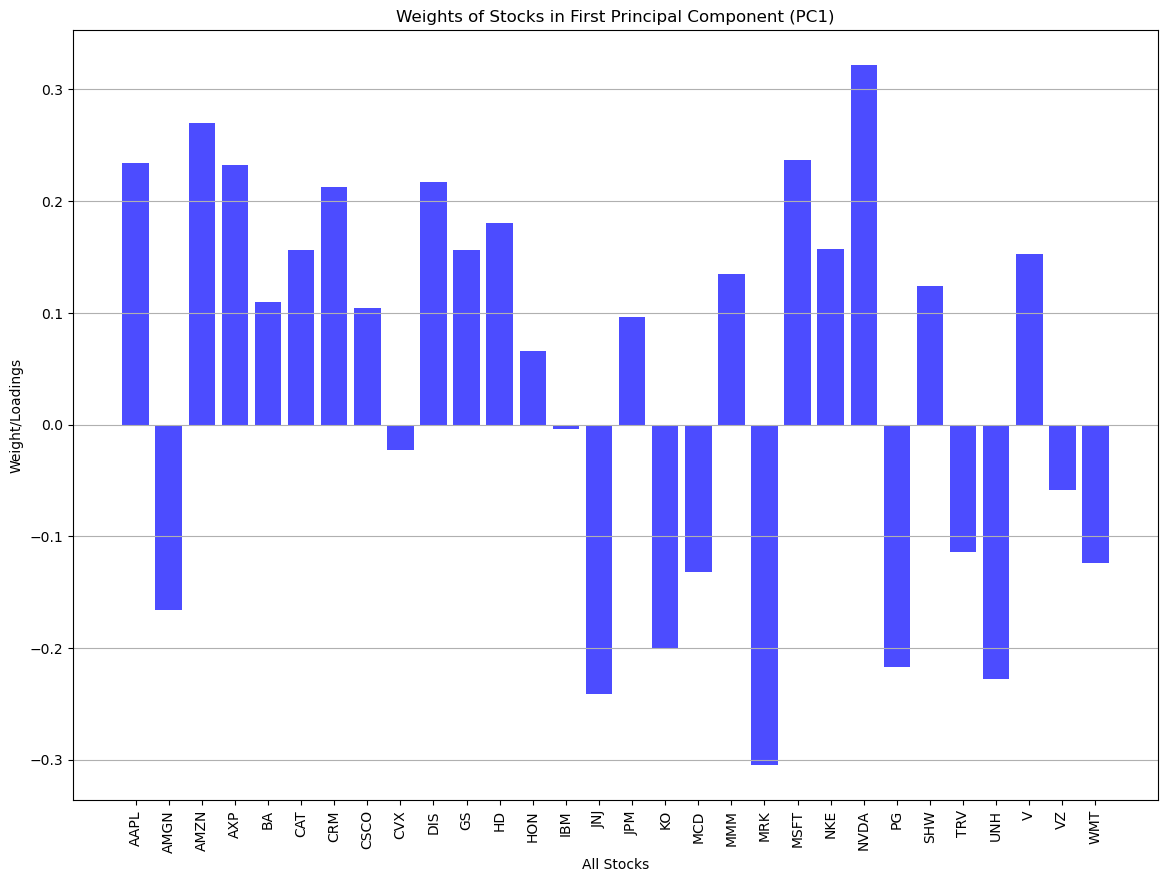

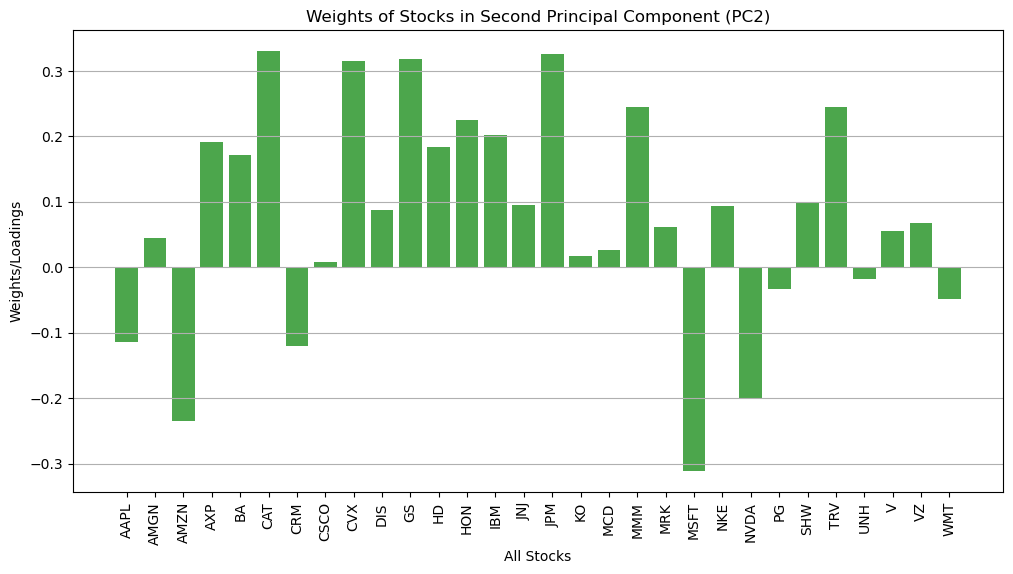

In [1]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA


# instantiate the data for the 30 stocks defined by the tickers 
all_dow_tickers  = ['MMM', 'AXP', 'AMGN','AMZN', 'AAPL', 'BA', 'CAT', 'CVX', 'CSCO', 'KO', 'DIS','GS', 'HD', 
                    'HON', 'IBM', 'JNJ', 'JPM', 'MCD', 'MRK', 'MSFT', 'NKE', 
                    'NVDA','PG','CRM','SHW', 'TRV', 'UNH', 'VZ','V',
                    'WMT',]
all_dow_tickers.sort()


# download all the ticker data using yahoo finance functionality 
yahoo_finance_data = pd.DataFrame(yf.download(all_dow_tickers, start="2023-01-01", end="2023-12-31"))["Adj Close"]
# use the unnormalized returns 
unnormalized_daily_returns = yahoo_finance_data.reset_index().drop(columns='Date').pct_change()*100

# compute the correlation matrix using corr() functionality on the logarithm returns

correlation_matrix_stocks = unnormalized_daily_returns.corr()


# instantiate a pca object to fit the correlation matrix
pca_object = PCA()
# fit using the correlation matrix 
pca_object.fit(correlation_matrix_stocks)


# get the loading components/ contributions for the first and second principal components 
pca1_loadings = pca_object.components_[0]
pca2_loadings = pca_object.components_[1]

# construct a loading data frame to plot the graph of the weightings of each components 

loadings_frame = pd.DataFrame({
    "Stocks": correlation_matrix_stocks.index,
    "PC1": pca1_loadings,
    "PC2": pca2_loadings
})
# visualize the loading components for the first principal component
plt.figure(figsize=(14, 10))
plt.bar(loadings_frame["Stocks"], loadings_frame["PC1"], color='blue', alpha=0.7)
plt.title("Weights of Stocks in First Principal Component (PC1)")
plt.xlabel("All Stocks")
plt.ylabel("Weight/Loadings")
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.show()



# visualize the loading components for the second principal component
plt.figure(figsize=(12, 6))
plt.bar(loadings_frame["Stocks"], loadings_frame["PC2"], color='green', alpha=0.7)
plt.title("Weights of Stocks in Second Principal Component (PC2)")
plt.xlabel("All Stocks")
plt.ylabel("Weights/Loadings")
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.show()



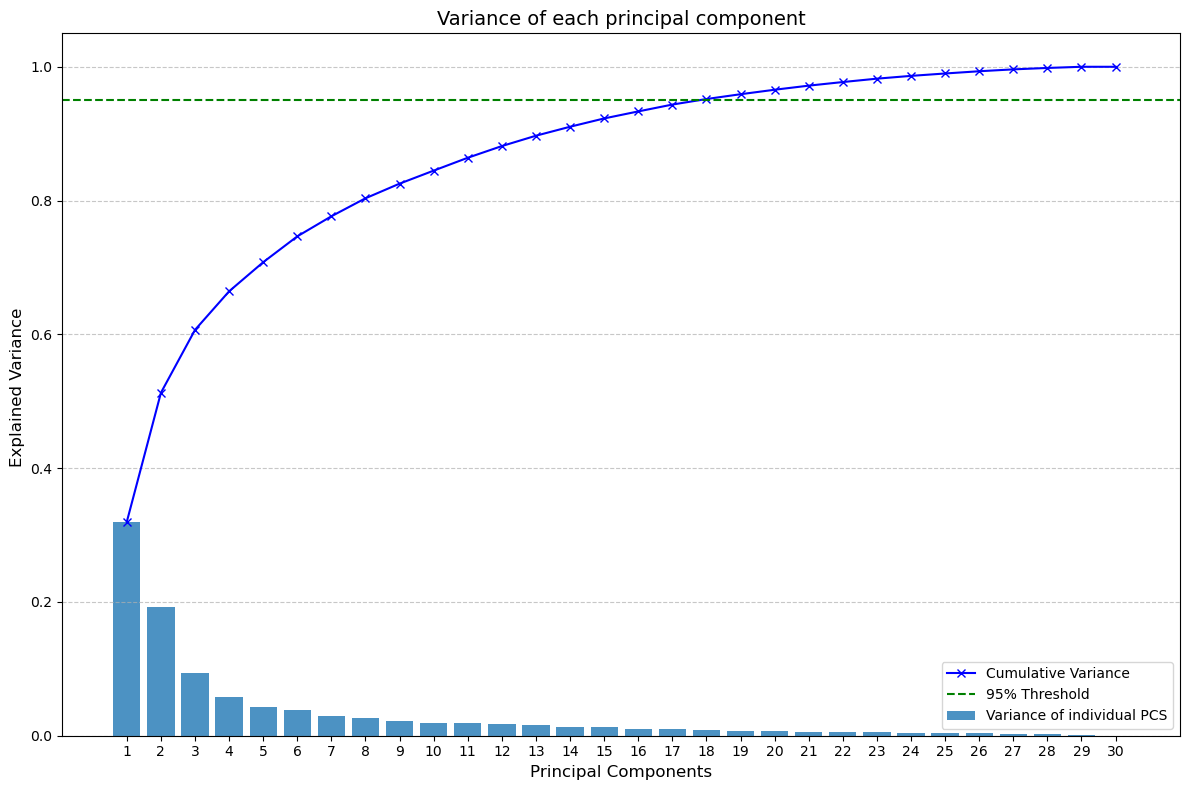

Number of principal components to explain 95% of the variance: 18


In [2]:
# get the explained variance ratio from the pca object 
explained_var_r = pca_object.explained_variance_ratio_

# Compute the cumulative variance necessary to compute number of principal components needed to explain 95 percent variance 
cumulative_var = np.cumsum(explained_var_r)

# plot the variance of each principal component
plt.figure(figsize=(12, 8))
plt.bar(range(1, len(explained_var_r) + 1), explained_var_r, alpha=0.8, label="Variance of individual PCS")
plt.plot(range(1, len(cumulative_var) + 1), cumulative_var, marker='x', color='blue', label="Cumulative Variance")
plt.axhline(y=0.95, color='green', linestyle='--', label="95% Threshold")

# show the needed data and labels for the principal components
plt.title("Variance of each principal component", fontsize=14)
# display the appropriate x label 
plt.xlabel("Principal Components", fontsize=12)
# display the appropriate y label
plt.ylabel("Explained Variance ", fontsize=12)
# use countable values for the x ranges
plt.xticks(range(1, len(explained_var_r) + 1))  
plt.legend(loc="best")
plt.grid(axis='y', linestyle="--", alpha=0.7)

# display the plot
plt.tight_layout()
plt.show()

# Compute the number of principal components needed for 95% variance
num_components_95 = np.argmax(cumulative_var >= 0.95) + 1
print(f"Number of principal components to explain 95% of the variance: {num_components_95}")

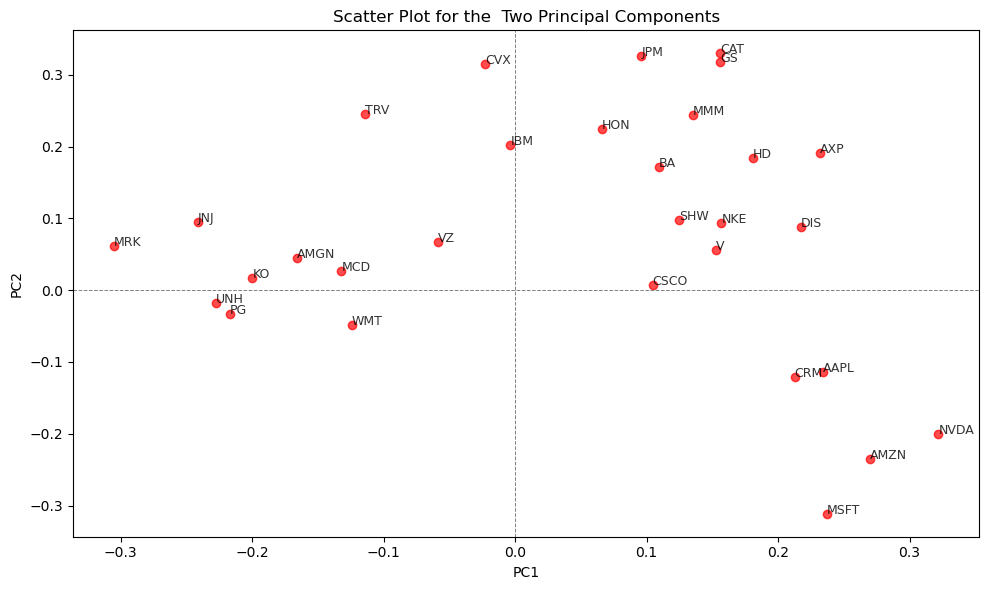

The first 3 most distant stocks for PC1 are using euclidean distance:
   Stock       PC1  Euclidean_Distance_PC1
19   MRK -0.304826                0.349874
14   JNJ -0.241135                0.286183
22  NVDA  0.321784                0.276736

 The first 3 most distant stocks for PC2 are using euclidean distance:
   Stock       PC2  Euclidean_Distance_PC2
20  MSFT -0.311424                0.388965
2   AMZN -0.234681                0.312222
22  NVDA -0.200291                0.277832


In [3]:
# define pc_scores data frame for visualization purposes
pc_scores_data_frame = pd.DataFrame({
    "Stock": loadings_frame["Stocks"],
    "PC1": pca1_loadings,
    "PC2": pca2_loadings
}) 

# plot a scatter plot for the first two scatter plots 

plt.figure(figsize=(10, 6))
# plot the score of the two pc scores 
plt.scatter(pca1_loadings, pca2_loadings, alpha=0.7, color="red")

# insert the appropriate text information
for i, stock in enumerate(pc_scores_data_frame["Stock"]):
    plt.text(pc_scores_data_frame["PC1"][i], pc_scores_data_frame["PC2"][i], stock, fontsize=9, alpha=0.8)

# insert the axis lines for better visualization
plt.axhline(0, color="grey", linestyle="--", linewidth=0.7)
plt.axvline(0, color="grey", linestyle="--", linewidth=0.7)
# insert the appropriate titles
plt.title("Scatter Plot for the  Two Principal Components")
# insert the appropriate x labels
plt.xlabel("PC1")
# insert the appropriate y labels 
plt.ylabel("PC2")
plt.tight_layout()
# display the plot of the graph
plt.show()



# compute the mean of all stocks for pc1 and pc2 
mean_principal_component1 = pc_scores_data_frame["PC1"].mean()
mean_principal_component2 = pc_scores_data_frame["PC2"].mean()

# compute the euclidean distance for the pcscores valus 
pc_scores_data_frame["Euclidean_Distance_PC1"] = np.sqrt((pc_scores_data_frame["PC1"] - mean_principal_component1)**2)
pc_scores_data_frame["Euclidean_Distance_PC2"] = np.sqrt((pc_scores_data_frame["PC2"] - mean_principal_component2)**2)

#get the 3 farthest stocks using the euclidean distance for each principal components
top3_principal_components1 = pc_scores_data_frame.nlargest(3, "Euclidean_Distance_PC1")
top3_principal_components2 = pc_scores_data_frame.nlargest(3, "Euclidean_Distance_PC2")

print("The first 3 most distant stocks for PC1 are using euclidean distance:")
print(top3_principal_components1[["Stock", "PC1", "Euclidean_Distance_PC1"]])
print("\n The first 3 most distant stocks for PC2 are using euclidean distance:")
print(top3_principal_components2[["Stock", "PC2", "Euclidean_Distance_PC2"]])



In [4]:
from scipy.cluster.hierarchy import linkage, dendrogram

# get the correlation matrix values to determine the pair wise distance dissimilarity
corr_values_stocks = correlation_matrix_stocks.values 

# compute the distance / dissimilarity matrix to d 
dissimilarity_matrix = np.sqrt(2 * (1 - corr_values_stocks))

print(f'the disimilarity matrix is : {dissimilarity_matrix}')

the disimilarity matrix is : [[0.         1.3496625  1.05671388 1.09903239 1.19205878 1.20879445
  1.11536959 1.15905906 1.31740592 1.14531843 1.21853004 1.10177708
  1.14360642 1.27846257 1.31236973 1.18287314 1.26509305 1.17779011
  1.18014654 1.37079424 0.95080183 1.16523818 1.05368085 1.27249835
  1.12743184 1.30022228 1.34980423 1.01584284 1.30242464 1.28505877]
 [1.3496625  0.         1.30258546 1.3306513  1.32070033 1.2655892
  1.33595949 1.25317382 1.29737477 1.31289339 1.2676082  1.24349235
  1.20717427 1.21100192 1.0894363  1.27909126 1.20238383 1.1825385
  1.21873713 1.16693722 1.35506328 1.28105617 1.42195749 1.16920661
  1.27565691 1.23593456 1.27225837 1.28898673 1.30662505 1.18344143]
 [1.05671388 1.30258546 0.         1.18641974 1.27730125 1.35009903
  1.07289792 1.21191934 1.4752721  1.16025091 1.24672103 1.12434293
  1.19299167 1.33024607 1.40257196 1.32016587 1.34713415 1.28630748
  1.24462335 1.46162013 0.92094722 1.21135009 1.11318321 1.3301322
  1.14004585 1.38788

C:\Users\25193\AppData\Local\Temp\ipykernel_19008\909539703.py:38: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  average_linkage_matrix = linkage(dissimilarity_matrix, method='average')


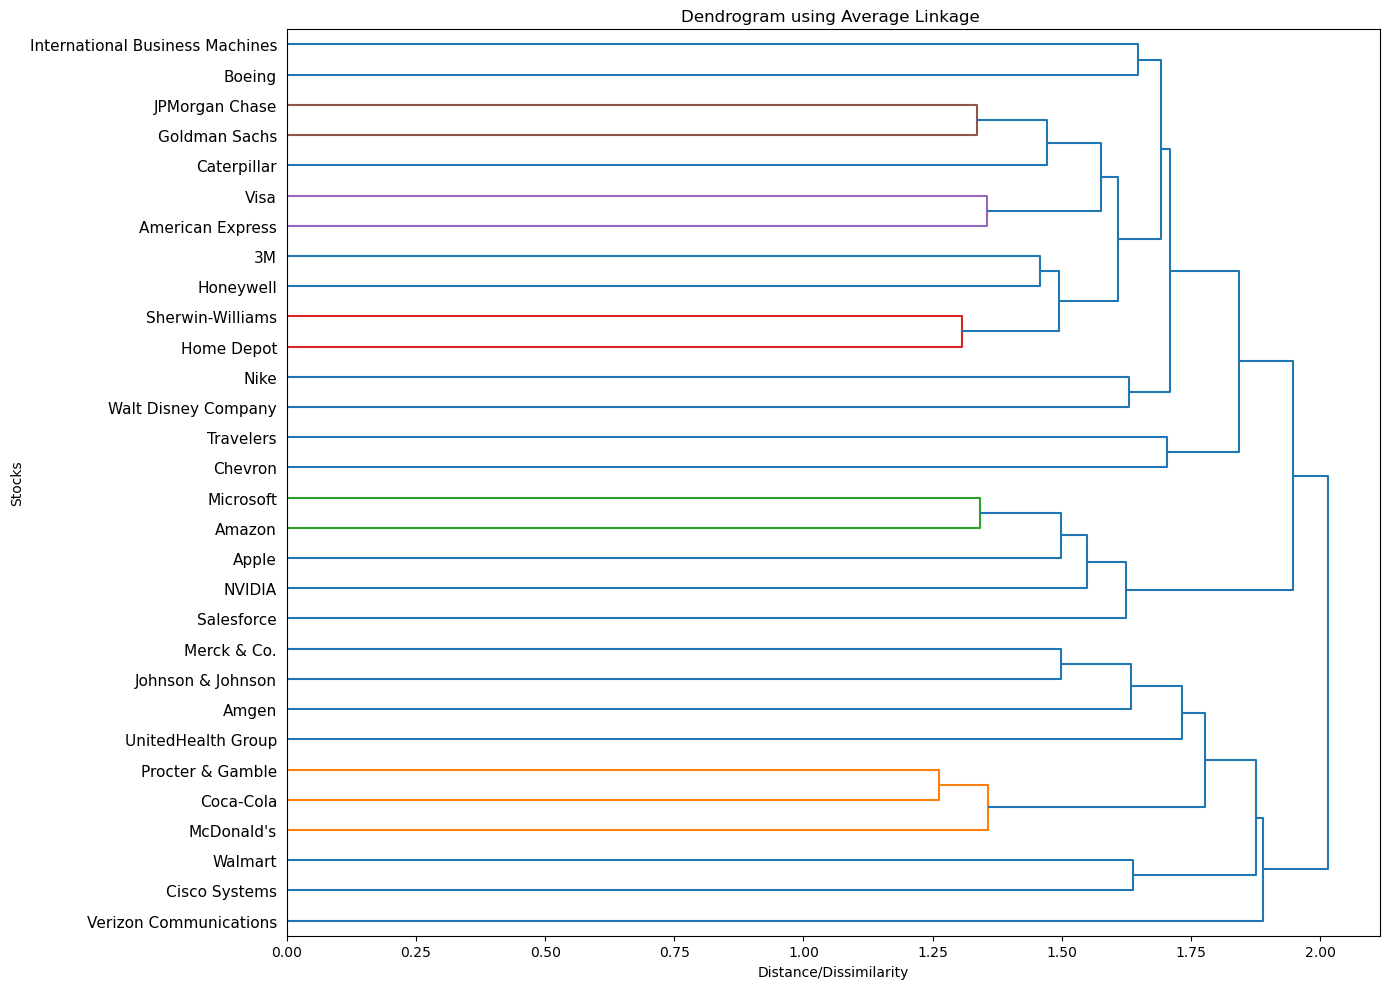

In [5]:
# get all stocks names 
company_map = company_map = {
    "MMM": "3M",
    "AXP": "American Express",
    "AMGN": "Amgen",
    "AMZN": "Amazon",
    "AAPL": "Apple",
    "BA": "Boeing",
    "CAT": "Caterpillar",
    "CVX": "Chevron",
    "CSCO": "Cisco Systems",
    "KO": "Coca-Cola",
    "DIS": "Walt Disney Company",
    "GS": "Goldman Sachs",
    "HD": "Home Depot",
    "HON": "Honeywell",
    "IBM": "International Business Machines",
    "JNJ": "Johnson & Johnson",
    "JPM": "JPMorgan Chase",
    "MCD": "McDonald's",
    "MRK": "Merck & Co.",
    "MSFT": "Microsoft",
    "NKE": "Nike",
    "NVDA": "NVIDIA",
    "PG": "Procter & Gamble",
    "CRM": "Salesforce",
    "SHW": "Sherwin-Williams",
    "TRV": "Travelers",
    "UNH": "UnitedHealth Group",
    "VZ": "Verizon Communications",
    "V": "Visa",
    "WMT": "Walmart"
}
company_names = [company_map[code] for code in correlation_matrix_stocks.index]

# define a linkage matrix to draw the dendogram with, use the above dissimilarity matrix
# use average linkage
average_linkage_matrix = linkage(dissimilarity_matrix, method='average')

# visualize the dendogram using dendogram object

# define the size of the plot 
plt.figure(figsize=(14, 10))

# Assuming `stock_names` is a list of 30 stock names corresponding to the matrix rows/columns
# use orientation of right for a horizontal dendogram

dendrogram(
    average_linkage_matrix,
    orientation='right',        
    labels=company_names,  # insert the appropriate labels 
    leaf_font_size=11,          # change the leaf nodes font size for better readability
)

# insert the appropriate title
plt.title('Dendrogram using Average Linkage ')
# insert the appropriate x label
plt.xlabel('Distance/Dissimilarity')
# insert the appropriate y label
plt.ylabel('Stocks')
plt.tight_layout()
# display the plot 
plt.show()

c:\Users\25193\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


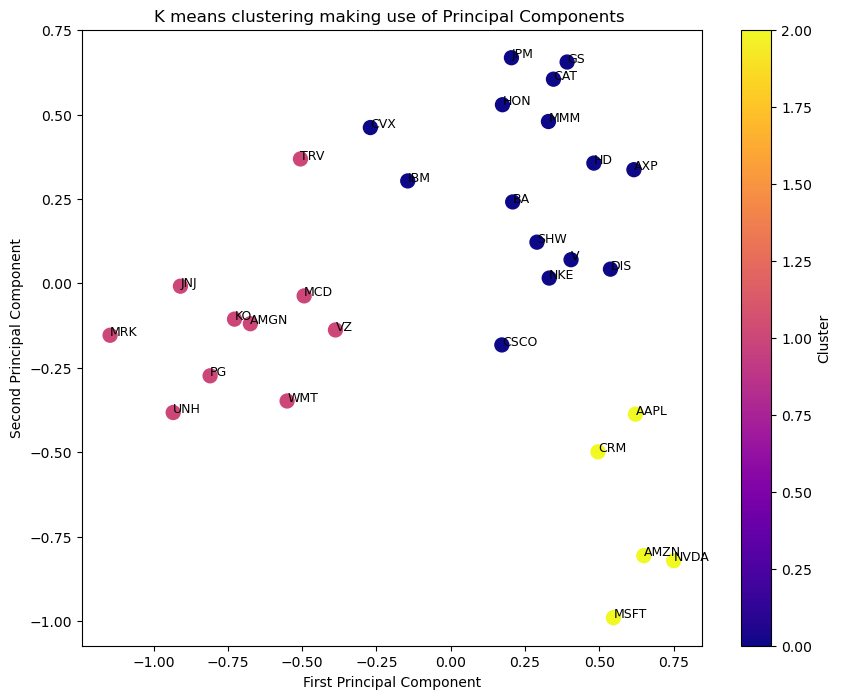

Cluster 2: Apple, Amazon, Salesforce, Microsoft, NVIDIA
Cluster 1: Amgen, Johnson & Johnson, Coca-Cola, McDonald's, Merck & Co., Procter & Gamble, Travelers, UnitedHealth Group, Verizon Communications, Walmart
Cluster 0: American Express, Boeing, Caterpillar, Cisco Systems, Chevron, Walt Disney Company, Goldman Sachs, Home Depot, Honeywell, International Business Machines, JPMorgan Chase, 3M, Nike, Sherwin-Williams, Visa


In [6]:
# import the neccessary library 
from sklearn.cluster import KMeans


# use a pca object with 2 principal components 
pca_object_2 = PCA(n_components=2)
# get the pca score by projecting the data into two principal components 
pca_scores = pca_object_2.fit_transform(correlation_matrix_stocks)

# get the weightings/loadings of each principal components 
# define the first principal component loadings 
pc1_loadings = pca_object_2.components_[0] 
# define the second principal component loadings/ weightings 
pc2_loadings = pca_object_2.components_[1]

# instantiate a kmeans object using 3 clusters 
kmeans = KMeans(n_clusters=3, random_state=42)
# get the clusters using the kmeans object 
clusters = kmeans.fit_predict(pca_scores)

# create the dataframe for a better visualization 

clusteredStocks = pd.DataFrame({
    # get the stocks to be used as labels 
    'All stocks': correlation_matrix_stocks.index,
    # define the first principal component score
    'Principal_comp1': pca_scores[:, 0],  
    # define the second principal component score
    'Principal_comp2': pca_scores[:, 1],  
    'Cluster': clusters
})


plt.figure(figsize=(10, 8))

# Use different colors for each cluster to identify d
plt.scatter(clusteredStocks['Principal_comp1'], clusteredStocks['Principal_comp2'], c=clusteredStocks['Cluster'], 
            cmap='plasma', s=100)

# Add a text label identifying the stocks 
for i, stock in enumerate(clusteredStocks['All stocks']):
    plt.text(clusteredStocks['Principal_comp1'][i], clusteredStocks['Principal_comp2'][i], stock, fontsize=9)
# insert the appropriate title
plt.title('K means clustering making use of Principal Components ')
# insert the x label
plt.xlabel('First Principal Component')
# insert the y label 
plt.ylabel('Second Principal Component')
# show a color for the different clusters 
plt.colorbar(label='Cluster')
# display the plot 
plt.show()


# show the clustered groups

for c_id in clusteredStocks['Cluster'].unique():
    cluster_members = clusteredStocks[clusteredStocks['Cluster'] == c_id]['All stocks']
    cluster_members_names= [company_map[com_id] for com_id in cluster_members]
    print(f"Cluster {c_id}: {', '.join(cluster_members_names)}")


